In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [8]:
hrr_gdf = pd.read_pickle('Dataframes/merged_hrr_gdf')
provider_gdf = pd.read_pickle('Dataframes/gdf_medicare_correct_hrr')

In [9]:
hrr_gdf.head()

,HRRCITY,HRRNUM,HRR_BDRY_I,geometry,HRRCITY_cleaned,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,AL- BIRMINGHAM,1,1,"(POLYGON ((-85.89658 32.70483, -85.90771000000...",ALBIRMINGHAM,ALBIRMINGHAM,36.255715,35875.130728,7724.118841,6577.098107
1,AL- DOTHAN,2,2,"(POLYGON ((-86.194 31.43991, -86.1947800000000...",ALDOTHAN,ALDOTHAN,38.452941,27610.974000,7038.365971,6012.843618
2,AL- HUNTSVILLE,5,3,"(POLYGON ((-86.69474000000001 34.42309, -86.71...",ALHUNTSVILLE,ALHUNTSVILLE,51.631450,28310.887690,7517.767617,6194.050393
3,AL- MOBILE,6,4,"(POLYGON ((-87.55554000000001 30.47282, -87.56...",ALMOBILE,ALMOBILE,41.545290,28951.019982,7639.114946,6356.235942
4,AL- MONTGOMERY,7,5,"POLYGON ((-86.49925 31.52517, -86.642280000000...",ALMONTGOMERY,ALMONTGOMERY,33.720548,25152.752548,7620.635288,6572.985890


In [10]:
provider_gdf.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,long_lat,geometry,city_state,HRRD
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91.0,32963.07,5777.24,4763.73,"(-85.3928604125977, 31.2167854309082)",POINT (-85.3928604125977 31.2167854309082),"DOTHAN, AL",ALDOTHAN
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14.0,15131.85,5787.57,4976.71,"(-86.3727798461914, 34.1399955749512)",POINT (-86.37277984619141 34.1399955749512),"BOAZ, AL",ALBIRMINGHAM
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24.0,37560.37,5434.95,4453.79,"(-87.6751022338867, 34.8017730712891)",POINT (-87.6751022338867 34.8017730712891),"FLORENCE, AL",ALBIRMINGHAM
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25.0,13998.28,5417.56,4129.16,"(-86.636100769043, 33.6505241394043)",POINT (-86.636100769043 33.6505241394043),"BIRMINGHAM, AL",ALBIRMINGHAM
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18.0,31633.27,5658.33,4851.44,"(-86.8290939331055, 33.2154388427734)",POINT (-86.8290939331055 33.2154388427734),"ALABASTER, AL",ALBIRMINGHAM


In [13]:
numerical_col = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
numerical_dict = dict.fromkeys(numerical_col, 'mean')

In [36]:
provider_agg = provider_gdf.groupby(['Provider Name']\
                                            ,as_index=False).agg(numerical_dict)

provider_geo_agg = provider_gdf[['Provider Name','geometry', 'HRRD' ]].\
                    drop_duplicates(subset = ['Provider Name'])

In [46]:
provider_gdf_agg= provider_geo_agg.merge(provider_agg,\
                           on = 'Provider Name')

In [47]:
provider_gdf_agg.head()

,Provider Name,geometry,HRRD,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,SOUTHEAST ALABAMA MEDICAL CENTER,POINT (-85.3928604125977 31.2167854309082),ALDOTHAN,58.750000,35247.028152,8749.025109,7678.214348
1,MARSHALL MEDICAL CENTER SOUTH,POINT (-86.37277984619141 34.1399955749512),ALBIRMINGHAM,28.959184,16451.092041,6812.131224,5793.631429
2,ELIZA COFFEE MEMORIAL HOSPITAL,POINT (-87.6751022338867 34.8017730712891),ALBIRMINGHAM,45.360465,36942.357442,8197.237907,7145.959535
3,ST VINCENT'S EAST,POINT (-86.636100769043 33.6505241394043),ALBIRMINGHAM,33.528736,27757.640000,8181.648391,6810.429310
4,SHELBY BAPTIST MEDICAL CENTER,POINT (-86.8290939331055 33.2154388427734),ALBIRMINGHAM,31.487500,39728.130250,7789.416250,6563.419000


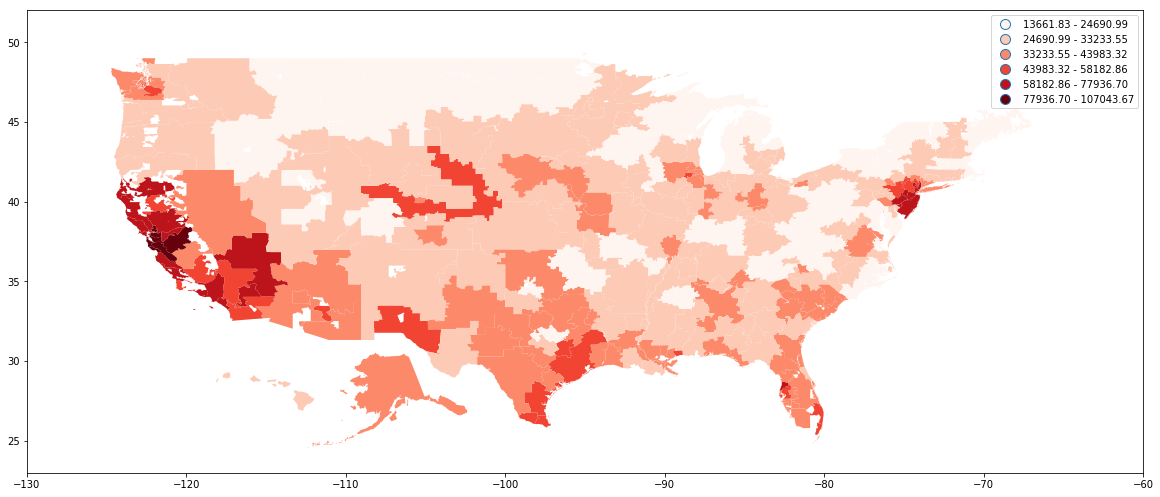

In [6]:
ax1 = hrr_gdf.plot(column='Average Covered Charges', scheme='fisher_jenks', cmap= plt.cm.Reds, legend=True, k =6)
ax1.set_xlim([-130, -60])
ax1.set_ylim([23, 52])
plt.rcParams["figure.figsize"] = [20,15]
ax1.tick_params(labelsize=10) 

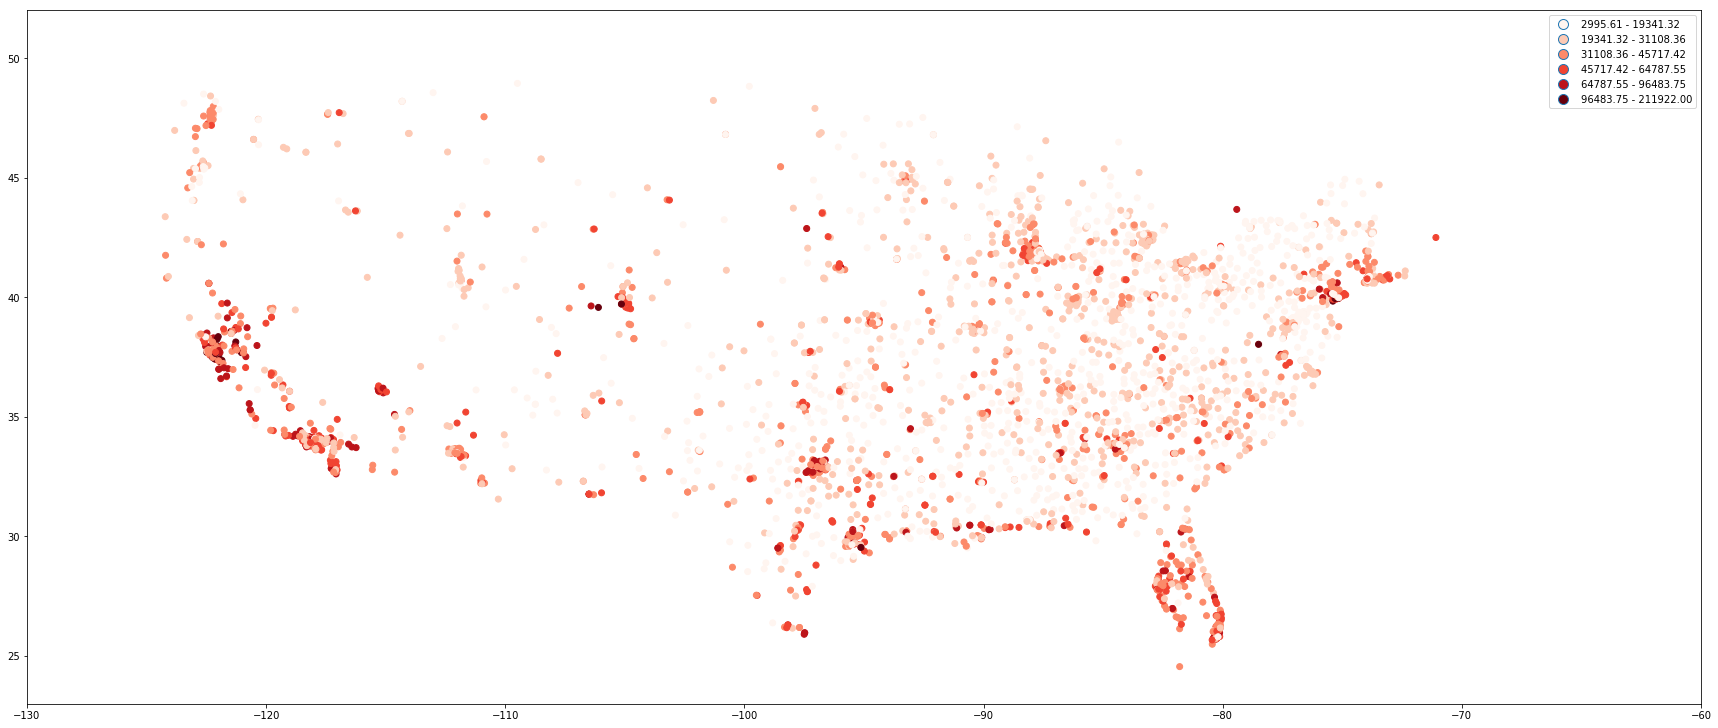

In [48]:
ax2 = provider_gdf_agg.plot(column='Average Covered Charges', scheme='fisher_jenks', cmap= plt.cm.Reds, legend=True, k =6)
ax2.set_xlim([-130, -60])
ax2.set_ylim([23, 52])
plt.rcParams["figure.figsize"] = [20,15]
ax2.tick_params(labelsize=10) 

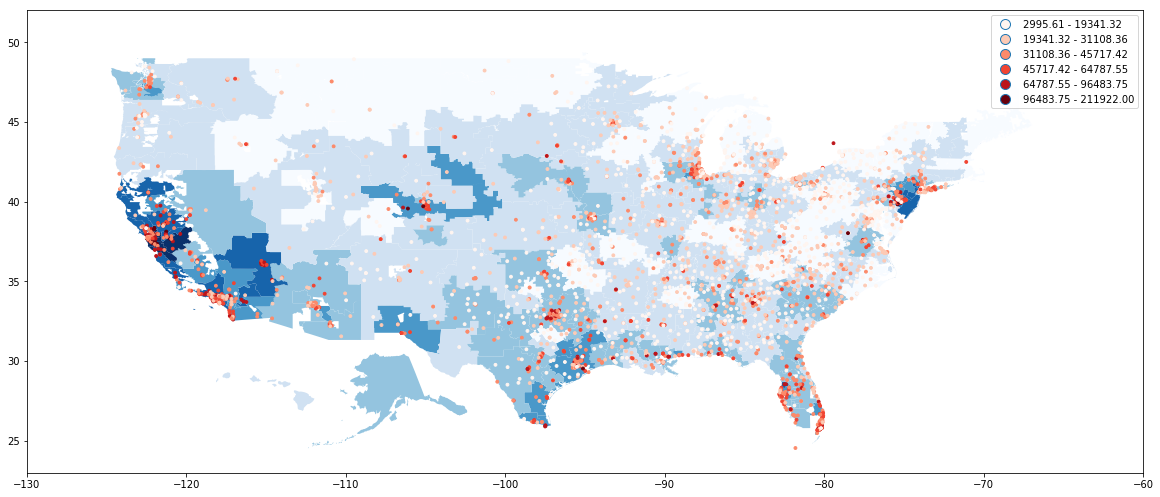

In [49]:
base = hrr_gdf.plot(column='Average Covered Charges', scheme='fisher_jenks', cmap= plt.cm.Blues, legend=True, k =6)
leg = base.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
ax3 = provider_gdf_agg.plot(ax = base, column='Average Covered Charges', scheme='fisher_jenks', cmap= plt.cm.Reds, markersize = 8, \
                        legend=True, k =6)
ax3.set_xlim([-130, -60])
ax3.set_ylim([23, 52])
plt.rcParams["figure.figsize"] = [30,25]